# Часть 1. АИС Реестр зелёных насаждений г. Москвы 

## Часть 1.3 Аггрегация точек по ландшафтным контурам

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# библиотека для визуализации
# %matplotlib widget
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.moran import Moran
import plotly.express as px
import plotly.graph_objects as go

In [2]:
root_land_general = gpd.read_file('root_landscape.shp')
root_land_general.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LAYER       9 non-null      object  
 1   Id          9 non-null      int64   
 2   acer_negun  9 non-null      float64 
 3   area        9 non-null      float64 
 4   acer_plata  9 non-null      float64 
 5   aesculus_h  9 non-null      float64 
 6   tilia_cord  9 non-null      float64 
 7   betula_pen  9 non-null      float64 
 8   populus_ba  9 non-null      float64 
 9   fraxinus_e  9 non-null      float64 
 10  sorbus_auc  9 non-null      float64 
 11  fraxinus_p  9 non-null      float64 
 12  malus_dome  9 non-null      float64 
 13  acer_neg_n  9 non-null      float64 
 14  acer_pla_n  9 non-null      float64 
 15  aesculus_n  9 non-null      float64 
 16  tilia_co_n  9 non-null      float64 
 17  betula_p_n  9 non-null      float64 
 18  populus_n   9 non-null      float64 
 19  frax

In [13]:
root_land_general.head()

,LAYER,Id,acer_negun,area,acer_plata,aesculus_h,tilia_cord,betula_pen,populus_ba,fraxinus_e,...,acer_pla_n,aesculus_n,tilia_co_n,betula_p_n,populus_n,fraxin_e_n,sorbus_a_n,fraxin_p_n,malus_do_n,geometry
0,Polygon,18,52085.0,1.023439e+08,72953.0,10935.0,72730.0,74709.0,27741.0,26240.0,...,7.128224,1.068457,7.106435,7.299803,2.71057,2.563906,3.21319,1.007877,1.47854,"POLYGON ((411419.162 6159865.983, 411199.257 6..."
1,Polygon,6,103595.0,1.390906e+08,64605.0,7864.0,60326.0,53695.0,25833.0,28302.0,...,4.644814,0.565387,4.337173,3.860433,1.85728,2.034789,1.29908,0.567903,0.58789,"POLYGON ((426614.288 6171676.145, 426596.271 6..."
2,Polygon,10,138022.0,1.388847e+08,101856.0,13548.0,89242.0,73647.0,43438.0,39413.0,...,7.333855,0.975486,6.425620,5.302746,3.12763,2.837822,2.25396,0.935813,1.02488,"POLYGON ((411980.265 6159699.217, 411871.918 6..."
3,Polygon,24,130970.0,1.516455e+08,64283.0,9749.0,72678.0,34612.0,35091.0,30190.0,...,4.239033,0.642881,4.792626,2.282429,2.31402,1.990828,1.04514,0.782285,0.56520,"POLYGON ((397828.692 6183639.474, 397754.810 6..."
4,Polygon,4,8139.0,1.065401e+07,3006.0,506.0,2545.0,2230.0,1944.0,1725.0,...,2.821472,0.474938,2.388771,2.093108,1.82466,1.619108,0.76215,0.275014,0.26844,"POLYGON ((423306.343 6164090.767, 422555.158 6..."


In [3]:
import plotly.graph_objects as go

# Assuming your data is in a GeoDataFrame called 'gdf'
species_columns = [
    'acer_neg_n',
    'acer_pla_n',
    'tilia_co_n',
    'betula_p_n',
    'populus_n',
    'fraxin_e_n',
    'sorbus_a_n',
    'fraxin_p_n',
    'malus_do_n',
    'aesculus_n'
]

# Define custom colors for the bars
custom_colors = [
    '#6BBF59',      # acer_neg_n
    '#FFB347',     # acer_pla_n
    '#FFB347',     # tilia_co_n
    '#FFB347',     # betula_p_n
    '#D3D3D3',     # populus_n
    '#D3D3D3',     # fraxin_e_n
    '#D3D3D3',     # sorbus_a_n
    '#D3D3D3',     # fraxin_p_n
    '#D3D3D3',     # malus_do_n
    '#D3D3D3'      # aesculus_n
]

def create_polygon_plot(index, polygon_data, polygon_name):
    # Create a bar chart with custom colors
    bar_trace = go.Bar(x=species_columns, y=polygon_data, name='Area', marker=dict(color=custom_colors))
    
    # Set up the layout with adjusted width, height, and font size
    layout = go.Layout(
        title=dict(text=f'Trees per hectare in {polygon_name}', font=dict(size=22)),
        xaxis=dict(title='Species', tickangle=45, title_font=dict(size=18), tickfont=dict(size=14)),
        yaxis=dict(title='Trees per hectare', title_font=dict(size=18), tickfont=dict(size=14)),
        width=600,
        height=400
    )

    # Create the Figure and display it
    fig = go.Figure(data=[bar_trace], layout=layout)
    fig.show()

# Iterate over the polygons and create plots
for index, row in root_land_general.iterrows():
    polygon_data = row[species_columns]
    create_polygon_plot(index, polygon_data, row['LAYER'])

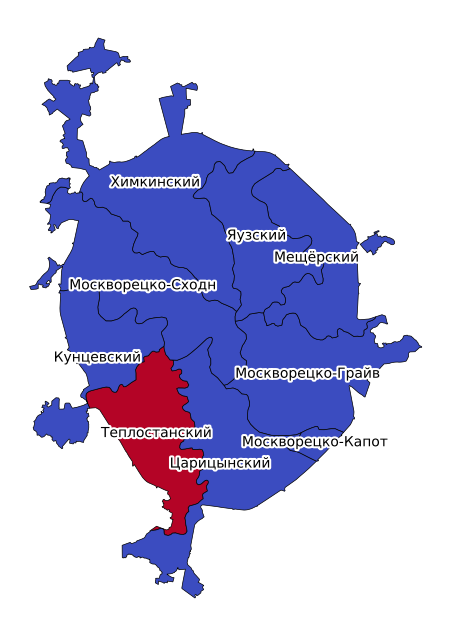

In [4]:
from matplotlib import patheffects

# Assuming your data is in a GeoDataFrame called 'root_land_general'

# Create a new column 'color' to store the color of each polygon based on the conditions
root_land_general['color'] = root_land_general.apply(lambda row: 'red' if row['acer_neg_n'] == max(row[species_columns]) else 'blue', axis=1)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 8))
root_land_general.plot(ax=ax, column='color', legend=False, cmap='coolwarm_r', edgecolor='black', linewidth=0.5)

# Add labels for each polygon
for index, row in root_land_general.iterrows():
    label = f"{row['LAYER']}"
    text = ax.annotate(
        label,
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        xytext=(0, 0),
        textcoords='offset points',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=10
    )
    text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])

ax.axis('off')
plt.show()

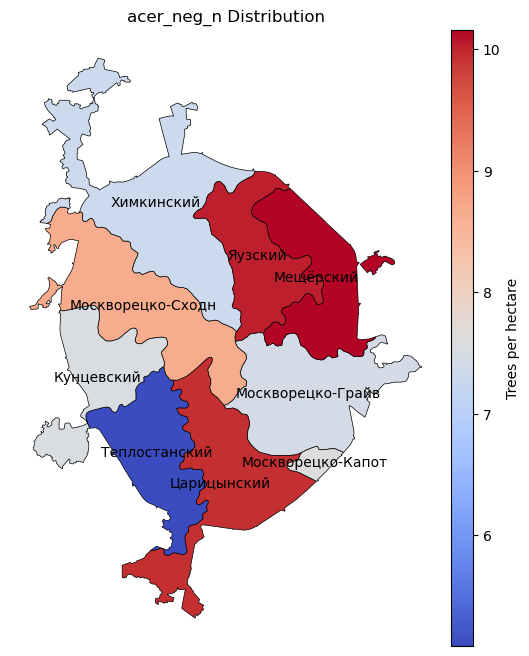

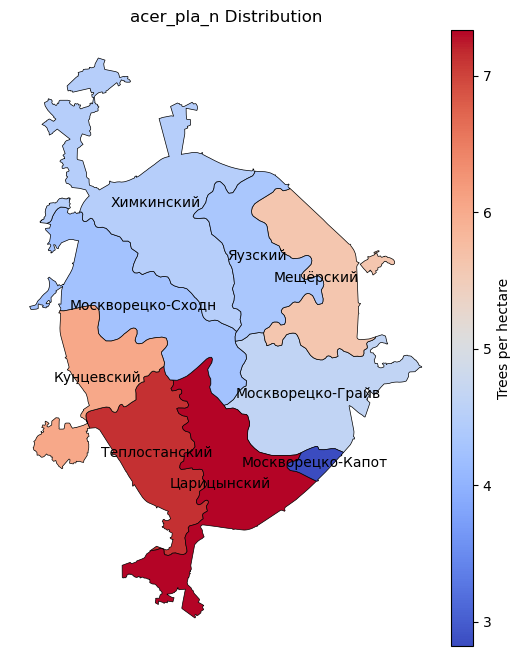

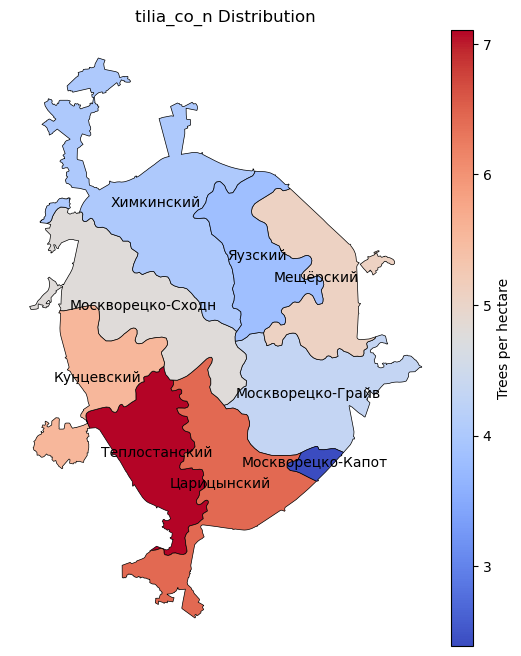

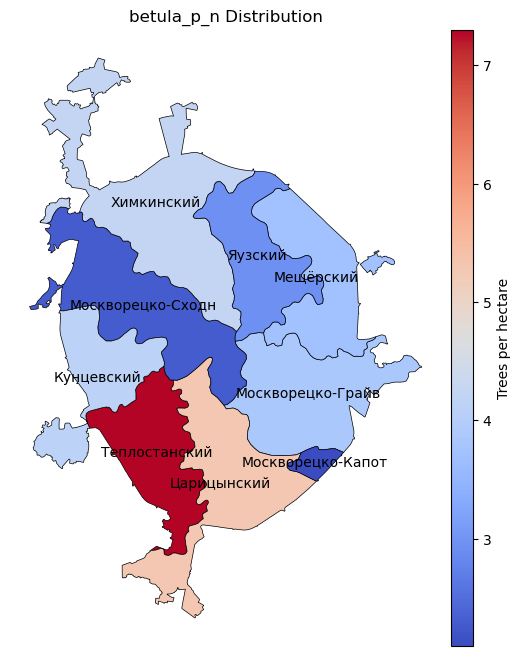

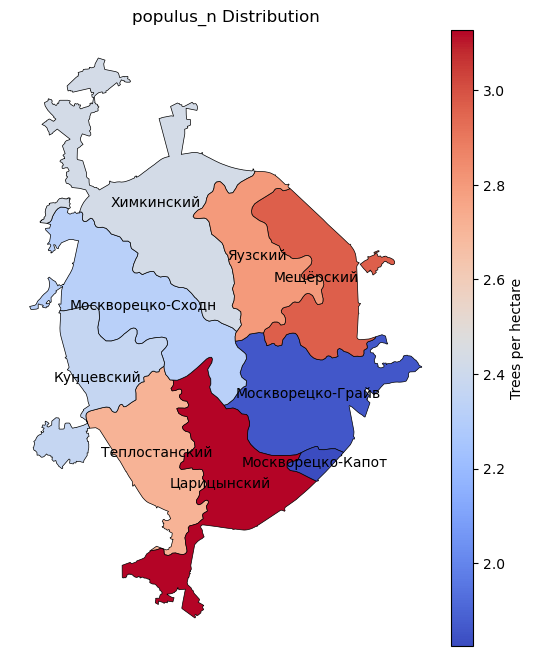

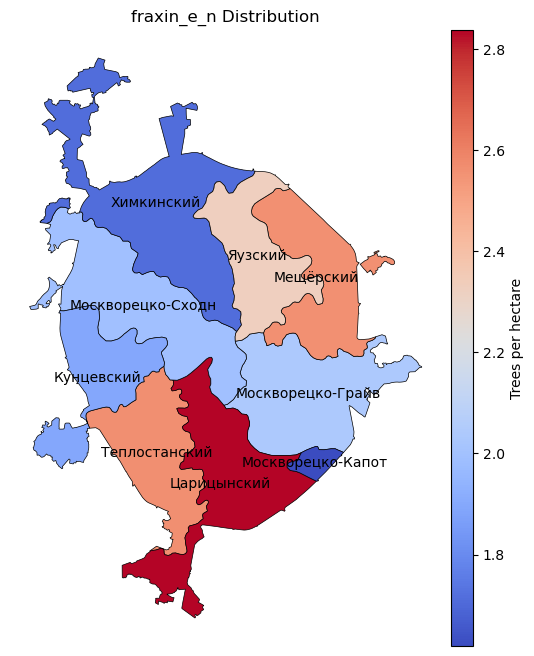

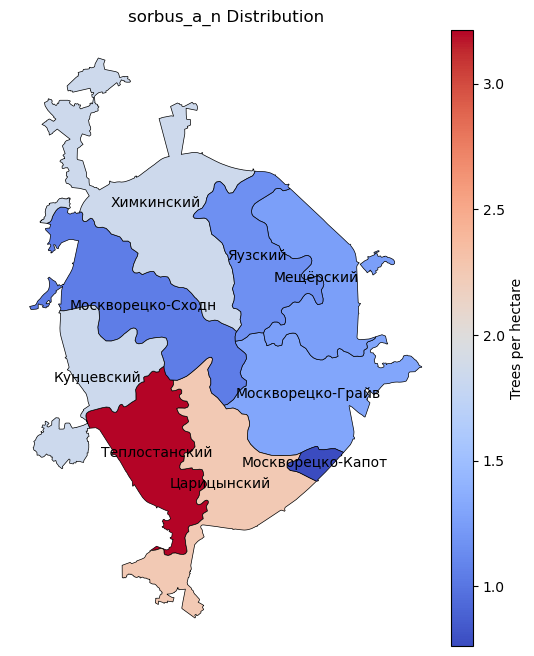

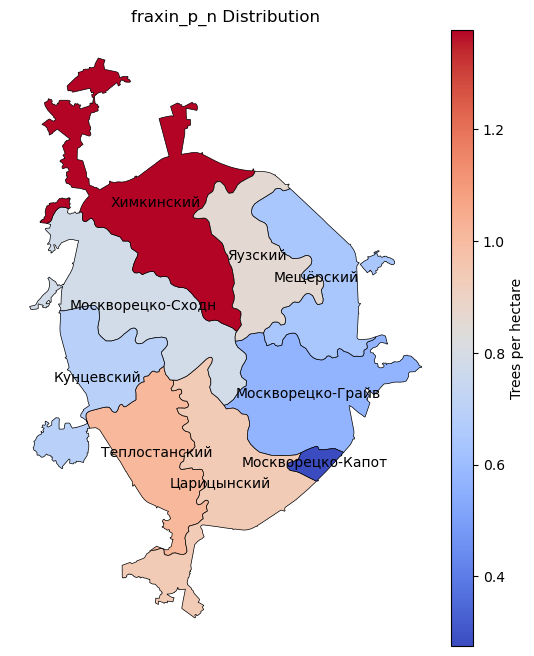

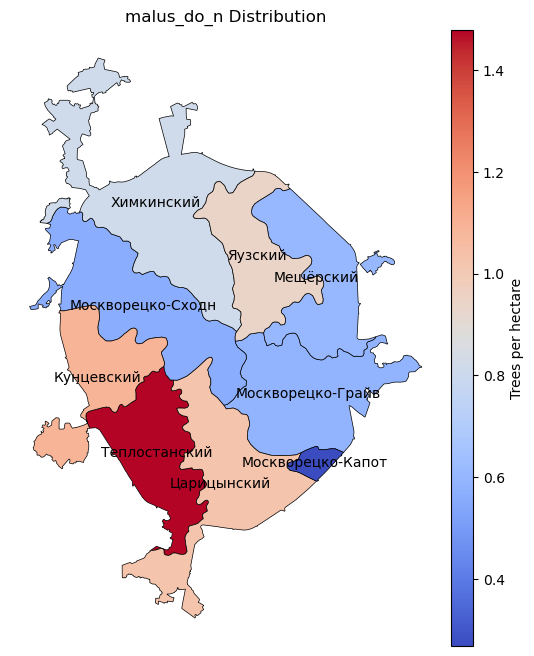

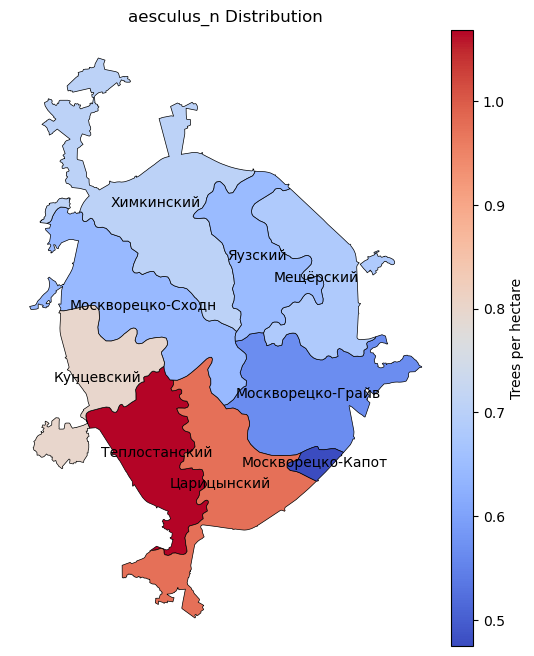

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

# Assuming your data is in a GeoDataFrame called 'gdf'

def create_species_map(species):
    fig, ax = plt.subplots(figsize=(12, 8))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    root_land_general.plot(ax=ax, column=species, legend=True, cmap='coolwarm', edgecolor='black', linewidth=0.5, cax=cax)
    cax.set_ylabel('Trees per hectare')

    # Add labels for each polygon
    for index, row in root_land_general.iterrows():
        label = f"{row['LAYER']}"
        ax.annotate(
            label,
            xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
            xytext=(0, 0),
            textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10
        )

    ax.set_title(f'{species} Distribution')
    ax.set_axis_off()  # Remove the coordinates axis
    plt.show()

# Create a map for each species
for species in species_columns:
    create_species_map(species)